<a href="https://colab.research.google.com/github/jubotero/cursoML/blob/master/S05/SummanS05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<h1> Curso de Análisis de datos y Machine Learning en Python</h1>



# Contenido Sesión 5

- <a href="#met">1. Métricas</a><br>
- <a href="#OEL">2. Otros estimadores lineales</a><br>
    - <a href="#ridge">2.1 Regresión lineal Ridge</a><br>
    - <a href="#lasso">2.2 Regresión lineal Lasso</a><br>
    - <a href="#taller">2.3 Taller</a><br>
    - <a href="#redela">2.4. Redes elásticas</a><br>
- <a href="#regpol">3. Regresión polinómica</a><br>
- <a href="#regnl">4. Regresión no lineal</a><br>



<p><a name="met"></a></p>

# 1. Métricas

[[Contenidos]](#contents)

En la sesión anterior estudiamos un modelo de regresión simple, por medio del cual se hace una predicción calculando una suma ponderada de las características de entrada, más una constante llamada término de sesgo (también llamado intercepto).

$$y=w_0+w_1x_1+w_2x_2+...+w_nx_n$$

Primero necesitamos de una medida de qué tan bien (o mal) el modelo se ajusta a los datos de entrenamiento. Esta medida de evaluación (función de costo) es el error calculado entre la recta generada $\hat{y}$ (o el hiperplano) a los puntos reales. El entrenamiento del modelo será entonces encontrar los valores de $w_i$ que minimicen dicha función de costo. Entre las métricas más populares encontramos:

* Error medio absoluto (MAE)

$$MAE = \frac{1}{m}\sum_{i=1}^{m}|\hat{y}_i -y_i|$$

* Error cuadrático medio (MSE)

$$MSE=\frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}_i -y_i\right)^2$$

* Raíz del error cuadrático medio (RMSE)

$$RMSE=\sqrt{\frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}_i -y_i\right)^2}$$

*Coeficiente de determinación $R^2$

$$R^2=1-\frac{\sum_{i=1}^{m}\left(\hat{y}_i -y_i\right)^2}{\sum_{i=1}^{m}\left(\bar{y} -y_i\right)^2}$$

Estas métricas las podemos obtener del módulo [metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn. Apliquémoslas al modelo lineal simple estudiado en la sesión anterior:

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

archivo = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(archivo)

#separemos nuestros datos en características y etiquetas
X = df['engine-size'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [2]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#seleccionamos los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

#entrenamos el modelo
linear  = LinearRegression(normalize=True)
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Obtengamos ahora los datos predichos por el modelo y calculemos las métricas

In [0]:
y_pred = linear.predict(X_test)

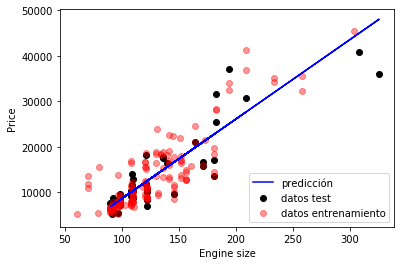

In [5]:
plt.scatter(X_test, y_test,  color='black',label=r'datos test')
plt.scatter(X_train, y_train,  color='red',alpha=0.4,label=r'datos entrenamiento')
plt.plot(X_test, y_pred, color='blue',label=r'predicción')
plt.legend(loc='lower right')
plt.xlabel(r'Engine size')
plt.ylabel(r'Price')
plt.show()

In [6]:
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  3017.348816752345
MSE:  18576671.47536118
RMSE:  4310.066295935734


Y calculemos el coeficiente de determinación $R^2$

In [7]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.7735450111026794


Comprobemos además si los errores se distribuyen según una distribución normal, lo que nos da una prueba de la validez de nuestro modelo. El siguiente se conoce como un *histograma de residuos*

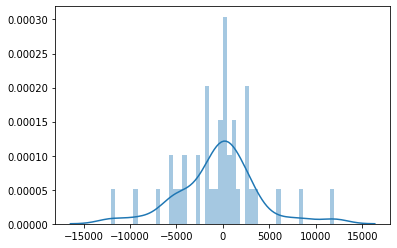

In [8]:
sns.distplot((y_test - y_pred), bins = 50)
plt.show()

Una vez que hemos entrenado el modelo de regresión lineal las predicciones se obtienen rápidamente. La complejidad computacional es lineal con respecto a la cantidad de instancias y características sobre las que desea hacer predicciones. En otras palabras, hacer predicciones con el doble de instancias (o el doble de características) tomará aproximadamente el doble de tiempo de computo. Existen diferentes formas de entrenar un modelo de regresión lineal, más adecuado para casos en los que hay una gran cantidad de características o demasiadas instancias de entrenamiento para que quepan en memoria.





<p><a name="OEL"></a></p>

# 2 Otros estimadores lineales

[[Contenidos]](#contents)

Dado el problema de multicolinealidad del algorírmo de mínimos cuadrados podemos mencionar dos opciones que vienen implementadas también en sklearn:

*   Regresión Ridge
*   Regresión Lasso




## 2.1 Regresión Ridge
<p><a name="ridge"></a></p>

En éste típo de algorítmo se impondrá una penalidad sobre los coeficientes calculados, de tal manera que se modificará el error de los mínimos cuadrados como:

$$\sum (Y_i-\hat Y_i)^2+\alpha \sum w_i^2 $$


El hiperparámetro $\alpha$, llamado complejidad, controla qué tanto se penaliza los coeficientes, haciendo que éstos sean más pequeños y por tanto estabilizando las soluciones aunque a costa de una menor sesibilidad a los datos.



Para comparar entrenemos un modelo LinearRegresor y uno Ridge con todos los datos

In [0]:
df.dropna(inplace=True)
variables=['symboling', 'normalized-losses', 'wheel-base', 'length',
       'width', 'height', 'curb-weight',
       'engine-size', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
       'city-L/100km',  'diesel', 'gas']
X = df[variables]
y = df['price']

In [10]:
X.shape

(196, 18)

In [11]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

#modelo OLS
linearM  = LinearRegression(normalize=True)
linearM.fit(X_train,y_train)
print('R2 OLS =',linearM.score(X_test,y_test))
print('wi OLS =',linearM.coef_)
print('w0 OLS =',linearM.intercept_)

#Modelo Ridge
print(5*'#')
ridge  = Ridge(alpha=1,normalize=True)
ridge.fit(X_train,y_train)
print('R2 Ridge =',ridge.score(X_test,y_test))
print('wi Ridge =',ridge.coef_)
print('w0 Ridge =',ridge.intercept_)

R2 OLS = 0.8435359669008109
wi OLS = [ 3.21614312e+01 -1.03220246e+01  1.41118840e+02 -2.23572818e+04
  4.32821190e+04  1.74105227e+02 -1.52039826e-01  1.11924260e+02
 -9.95886066e+01 -2.85373944e+03  6.92164686e+02  2.32587030e+01
  1.80134818e+00  2.27747260e+01  2.17008482e+02  1.52150525e+03
 -1.84019329e+03  1.84019329e+03]
w0 OLS = -76507.00943884654
#####
R2 Ridge = 0.7133951662369991
wi Ridge = [ 7.37216191e+01 -3.83731882e-01  6.53044658e+01  5.87166942e+03
  2.54199023e+04  2.68756816e+01  1.45468267e+00  3.67838020e+01
  1.19095810e+03 -4.71217393e+02  8.08538699e+01  2.89763652e+01
  3.06326189e-01 -5.65004684e+01 -5.56486013e+01  3.61066213e+02
  8.67411260e+02 -8.67411260e+02]
w0 Ridge = -38835.23676298204


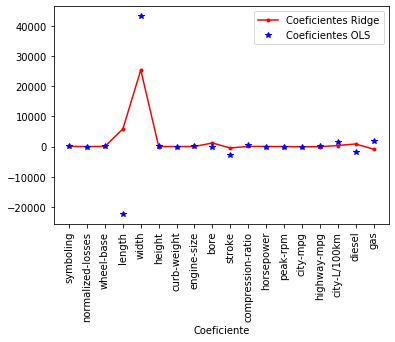

In [12]:
plt.figure()
plt.plot(ridge.coef_,'r.-',label=r'Coeficientes Ridge')
plt.plot(linearM.coef_,'b*',label=r'Coeficientes OLS')
plt.legend()
plt.xlabel(r'Coeficiente')
plt.xticks(np.arange(18),variables, rotation=90)
plt.show()

Vemos que en el caso del dataset para autos con un valor de $\alpha = 1$ se nota una pequeña variación en los parámetros y la precisión del modelo.

El modelo se hace robusto a variaciones de los predictores, pero pierde un poco de precisión (se necesitan más datos para entrenamiento)

En general el hiperparámetro $\alpha$ debe ser  buscado con varios experimentos.


## 2.2 Regresión Lasso
<p><a name="lasso"></a></p>

Al igual que el algorítmo Ridge, Lasso impone una penalidad sobre la función de error del OLS, pero ésta en cambio está dada por el valor absoluto de los coeficientes, así:
$$\sum (Y_i-\hat Y_i)^2+\alpha \sum |w_i|$$

Esto hace que a diferencia de Ridge que buscaba hacer pequeños los valores de algunos $w_i$, Lasso fuerza a que sean 0.

Así, puede decirse que Ridge es bueno cuando esperamos que todos los predictores tengan una influencia sobre el predictor así sea pequeña, mientras que Lasso se usará cuando esperamos que el numero de predictores relevantes sea pequeño (predictores con peso diferente de 0).

Para implementar una regresión tipo Lasso se sigue el mismo esquema de los casos anteriores.

In [13]:
from sklearn.linear_model import Lasso

#modelo Lasso
lasso  = Lasso(alpha=10,normalize=True)
lasso.fit(X_train,y_train)
print('R2 Lasso =',lasso.score(X_test,y_test))
print('wi Lasso =',lasso.coef_)
print('w0 Lasso =',lasso.intercept_)

R2 Lasso = 0.8360932068188104
wi Lasso = [-0.00000000e+00 -3.19883868e+00  0.00000000e+00 -0.00000000e+00
  3.43182211e+04  1.19391461e+02  0.00000000e+00  1.20148466e+02
 -0.00000000e+00 -2.49132114e+03  3.08466036e+02  2.00496318e+01
  1.51785391e+00  0.00000000e+00  0.00000000e+00  5.19565705e+02
  0.00000000e+00 -0.00000000e+00]
w0 Lasso = -49559.07715934429


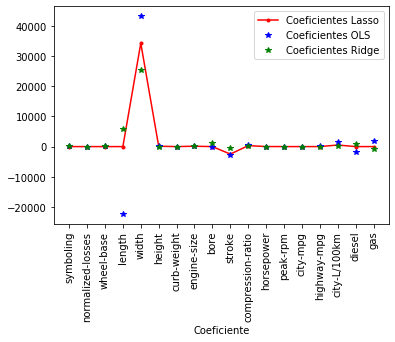

In [14]:
plt.figure()
plt.plot(lasso.coef_,'r.-',label=r'Coeficientes Lasso')
plt.plot(linearM.coef_,'b*',label=r'Coeficientes OLS')
plt.plot(ridge.coef_,'g*',label=r'Coeficientes Ridge')
plt.legend()
plt.xlabel(r'Coeficiente')
plt.xticks(np.arange(18),variables, rotation=90)
plt.show()

In [15]:
print('numero de coeficientes:',len(linearM.coef_))
print('numero de coeficientes diferentes a cero para Ridge:',len(ridge.coef_[ridge.coef_!=0]))
print('numero de coeficientes diferentes a cero para Lasso:',len(lasso.coef_[lasso.coef_!=0]))

numero de coeficientes: 18
numero de coeficientes diferentes a cero para Ridge: 18
numero de coeficientes diferentes a cero para Lasso: 9


Como vemos, Lasso ha disminuído el número de coeficientes mientras que Ridge no lo hace.

La elección entre éstos 3 tipos de regresión lineal depende fuertemente de nuestro dataset (sus correlaciones), nuestro conocimiento del campo (relaciones esperadas de las variables predictoras y la variable diana) y nuestras necesidades computacionales.

<p><a name="redela"></a></p>

## 2.3. Redes elásticas

[[Contenidos]](#contents)

Como vimos anteriormente, podemos generar penalizaciones a las regresiones lineales haciendo cambios en su metrica de error.

Para la regresión Ridge se penaliza con: $\alpha \sum w_i^2$ (penalidad $L_2$), mientras que para Lasso se tiene que: 
$\alpha \sum |w_i|$ (penalidad $L_1$). Cada una de ellas tenía sus pro y sus contra. Pero es posible hacer una combinación de ambos metodos.

A las regresiones que usan una combinación de ambas penalidades se les conoce como **ElasticNet** (Redes elásticas) y definimos su error como:
$$\sum (Y_i- \hat Y_i)^2+\alpha \rho \sum |w_i| + \frac{\alpha(1-\rho)}{2}\sum w_i^2. $$

Note que cuando $ \rho=1$ tenemos la regresión Lasso, y con $\rho=0$ tendremos la de Ridge, por tanto en las redes elásticas $0\leq \rho\leq1$.

Hemos dado un paso más en la complejización del modelo ya que ahora debemos preocuparnos por el ajuste de 2 hiperparámetros para seleccionar el mejor modelo.

Para usar las redes elásticas en sklearn debemos importar la función 'ElasticNet' del modulo de modelos lineales.

In [0]:
from sklearn.linear_model import ElasticNet

En la implementación de sklearn tenemos los hiperparámetros 'alpha' y 'l1_ratio' ($\rho$ en nuestra ecuación), con ellos controlaremos el comportamiento del regresor.

Tenga en cuenta que para valores de *l1_ratio* $\leq0.01$ el algoritmo de sklearn no es estable si usamos el valor de $\alpha$ por defecto y se hace necesario que nosotros mísmos ajustemos el valor. 

In [0]:
import pandas as pd
import numpy as np

df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')

df.dropna(inplace=True)

X = df['ENGINESIZE'].values.reshape(-1,1)
y = df['CO2EMISSIONS'].values

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn import metrics

#seleccionamos los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

#entrenamos el modelo
elastic = ElasticNet(alpha=0.01,l1_ratio=1,normalize=True)
elastic.fit(X_train,y_train)
y_pred = elastic.predict(X_test)

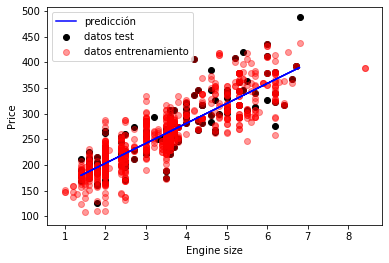

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test,  color='black',label=r'datos test')
plt.scatter(X_train, y_train,  color='red',alpha=0.4,label=r'datos entrenamiento')
plt.plot(X_test, y_pred, color='blue',label=r'predicción')
plt.legend(loc='best')
plt.xlabel(r'Engine size')
plt.ylabel(r'Price')
plt.show()

In [20]:
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2: ', elastic.score(X_test,y_test))

MAE:  21.996655219235205
MSE:  898.3256895519332
RMSE:  29.97208183546704
R2:  0.7597831059324895


De nuevo, los hiperparámetros debemos seleccionarlos con una busqueda para determinar una buena combinación.

#### Ejercicio:

1. En el dataset de autos (a1): elimine los datos faltantes, convierta las variables categoricas en variables dummies (a2), y separe el dataset en datos de entrenamiento y prueba.

2. Use dos ciclos 'for' para recorrer $\alpha$ en la lista [0.01,0.1,1,10,100,1000] y l1_ratio en [0.1,0.3,0.6,0.9,0.99,0.999], entrenando un modelo ElasticNet para las combinaciones de éstos y evaluandolo con RMSE. Guarde el valor de cada RMSE en un arreglo.

3. Haga un mapa de calor (a3) con los valores de $\alpha$ y l1_ratio del punto anterior y los valores de RMSE.


a1. 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'

a2. `pd.get_dummies()`

a3. `sns.heatmap(Matriz, xticklabels, yticklabels, annot=True)`

Hacer doble click **aquí** para ver la solución:

<!-- Respuesta:


#1
#eliminamos datos nulos
df.dropna(inplace=True)
#creamos las variables dummies
df_dummies = pd.get_dummies(df)
#separamos el dataset
X = df_dummies.drop('price',axis=1)
y = df_dummies['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

#2
#Creamos la lista de alphas, l1_ratios y el arreglo de RMESs
alphas =  [0.01,0.1,1,10,100,1000] 
l1s = [0.1,0.3,0.6,0.9,0.99,0.999]
RMSEs = []

#Recorremos los valores en los arreglos
for alpha in alphas:
  for l1 in l1s:
    elastic = ElasticNet(alpha=alpha,l1_ratio=l1,normalize=True)
    elastic.fit(X_train,y_train)
    y_pred = elastic.predict(X_test)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    #el metodo append agrega un valor al arreglo  
    RMSEs.append(RMSE)
RMSEs = np.array(RMSEs)

#3
import seaborn as sns
#pasamos de un arreglo a una matriz para usarlo en el mapa de calor
RMSEs = RMSEs.reshape(len(alphas),len(l1s))
sns.heatmap(RMSEs, xticklabels=alphas, yticklabels=l1s,annot=True )

--->

<p><a name="taller"></a></p>

## 2.3. Taller

[Contenidos](#contents) 

Analizar la tres regresiones lineales vistas en clase y ver la afectación de los resultados al implementar la normalización y la regularización con el parámetro $\alpha$

### Pregunta 1

Cargar el dataset de autos, eliminar las filas con valores nulos y dejar solo las columnas con variables numéricas

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

import pandas as pd
import numpy as np

archivo = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(archivo)

df.dropna(inplace=True)
dfNum=df.select_dtypes(include=['float64','int64'])

--->

### Pregunta 2

Definir la variable a predecir $y$ como el precio y la matriz de características $X$ con el resto de variables numéricas

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

y=dfNum['price']
X=dfNum.loc[:, dfNum.columns != 'price']
#alternativa dfNum.drop('price',axis=1)


--->

### Pregunta 3

Separar el dataset de cancer (incluído en los dataset de juguete de sklearn) en los subsets de entrenamiento (train) y prueba (test).

**ayuda:** importe from sklearn.datasets import load_breast_cancer
y use 'load_breast_cancer?' para ver la ayuda de éste dataset 


Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)


--->

### Pregunta 4

Para el dataset de autos, hacer una regresión por mínimos cuadrados y calcular el intercepto, los coeficientes y los score de entrenamiento y prueba  

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train, y_train)

print('Autos dataset')
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))


--->

### Pregunta 5

Hacer una regresión de Ridge y calcular el intercepto, los coeficientes, los score de entrenamiento y prueba. 

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:


from sklearn.linear_model import Ridge


linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Autos dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

--->

### Pregunta 6

Hacer normalización de los datos e la misma regresión de Ridge anterior y obtener las mismas métricas.

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Autos dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))


--->

### Pregunta 7

Implementar la regresión de Ridge con las variables escaldas para los siguientes valores del parámetro de regularización $\alpha=[0, 1, 10, 20, 50, 100, 1000]$

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))


--->

### Pregunta 8

Realizar los mismos calculos de las preguntas 5-7 pero esta vez para la regresión de Lasso

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()



X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Autos dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))


print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))


--->

<p><a name="regpol"></a></p>

# 3. Regresión polinómica

[[Contenidos]](#contents)

**Regresión Polinómica**

Hasta ahora nos hemos centrado en la creación de modelos lineales simples y multivariados en donde la relación entre la/las variable/variables predictora/predictoras y la variable blanco corrsponde a una relación lineal. 

No obstante, en algunas ocasiones las tendencias de los datos presentan un comportamiento curvo. En estos caso debemos buscar otro modelo para representar los datos, como es el método de **regresión polinómica**. Dentro de la regreción polinómica, tenemos varias tipos de regresiones dependiendo del grado del polinómio que usemos:

* Cuadrática: Si el polinomio que usamos es grado dos.
* Cúbica: Si el polinomio que usamos es grado tres.
* Cuártica: Si el polinomio que usamos es grado cuatro.
* etc

Podemos llamar a todos estos casos regresiones polinómicas, ya que la relación entre la variable independiente $x$ y la variable dependiente  $y$ se modela mediante un polinomio de grado n en la variable $x$:

\begin{equation}
\hat{y}=w_0x^0+w_1x^1+w_2x^2\cdots w_nx^n = \sum_{i=0}^nw_ix^i
\end{equation}

En donde los $w$'s representan los parámetros del ajuste o la regresión 

**¿Cómo podemos abordar una regresión polinómica?**

Existe un "truco" que nos permite convertir una regresión polinómica en una regresión lineal múltiple. Si definimos:

* $x_1=x$
* $x_2=x^2$
* $x_3=x^3$
* $\cdot$
* $\cdot$
* $\cdot$
* $x_n=x^n$

podemos tratar el problema como una regresión lineal múltiple de la forma

\begin{equation}
\hat{y}=w_0x_0+w_1x_1+w_2x_2\cdots w_nx_x = \sum_{i=0}^nw_ix_i
\end{equation}

Por ende, la regresión polinómica se considera un caso especial de la regresión lineal múltiple, de tal forma que se pueden usar los mismos mecanismos que una regresión lineal para resolver el problema del modelado de los datos.

**Base de datos**

A continuación, tomaremos un conjunto de datos correspondientes a la clasificaciones de consumo de combustibles específicas de los modelos de carros y las emisiones estimadas de dióxido de carbono de nuevos vehiculos ligeros para la venta al por menor en Canada. Para mayor información puede consultar el [link](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64). La base de datos contienen características como:

- **MODELYEAR** Año del vehiculo.
- **MAKE** Marca o fabricante
- **MODEL** Modelo del vehiculo.
- **VEHICLE CLASS** Clase del vehiculo
- **ENGINE SIZE** Tamaño del motor.
- **CYLINDERS** Número de cilindros
- **TRANSMISSION** Tipo de transmisión
- **FUEL CONSUMPTION in CITY(L/100 km)** Consumo en ciudad en litros por cada 100 km.
- **FUEL CONSUMPTION in HWY (L/100 km)** Consumo en autopista en litros por cada 100 km.
- **FUEL CONSUMPTION COMB (L/100 km)** Consumo combinado en litros por cada 100 km.
- **CO2 EMISSIONS (g/km)** Emisión en gramos por kilómetros.

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Lectura de los datos
df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv")

# Inspección visual del dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Escojamos algunas características que estén relacionadas con la emisión de dioxido de carbono. Veamos la matriz de dispersión

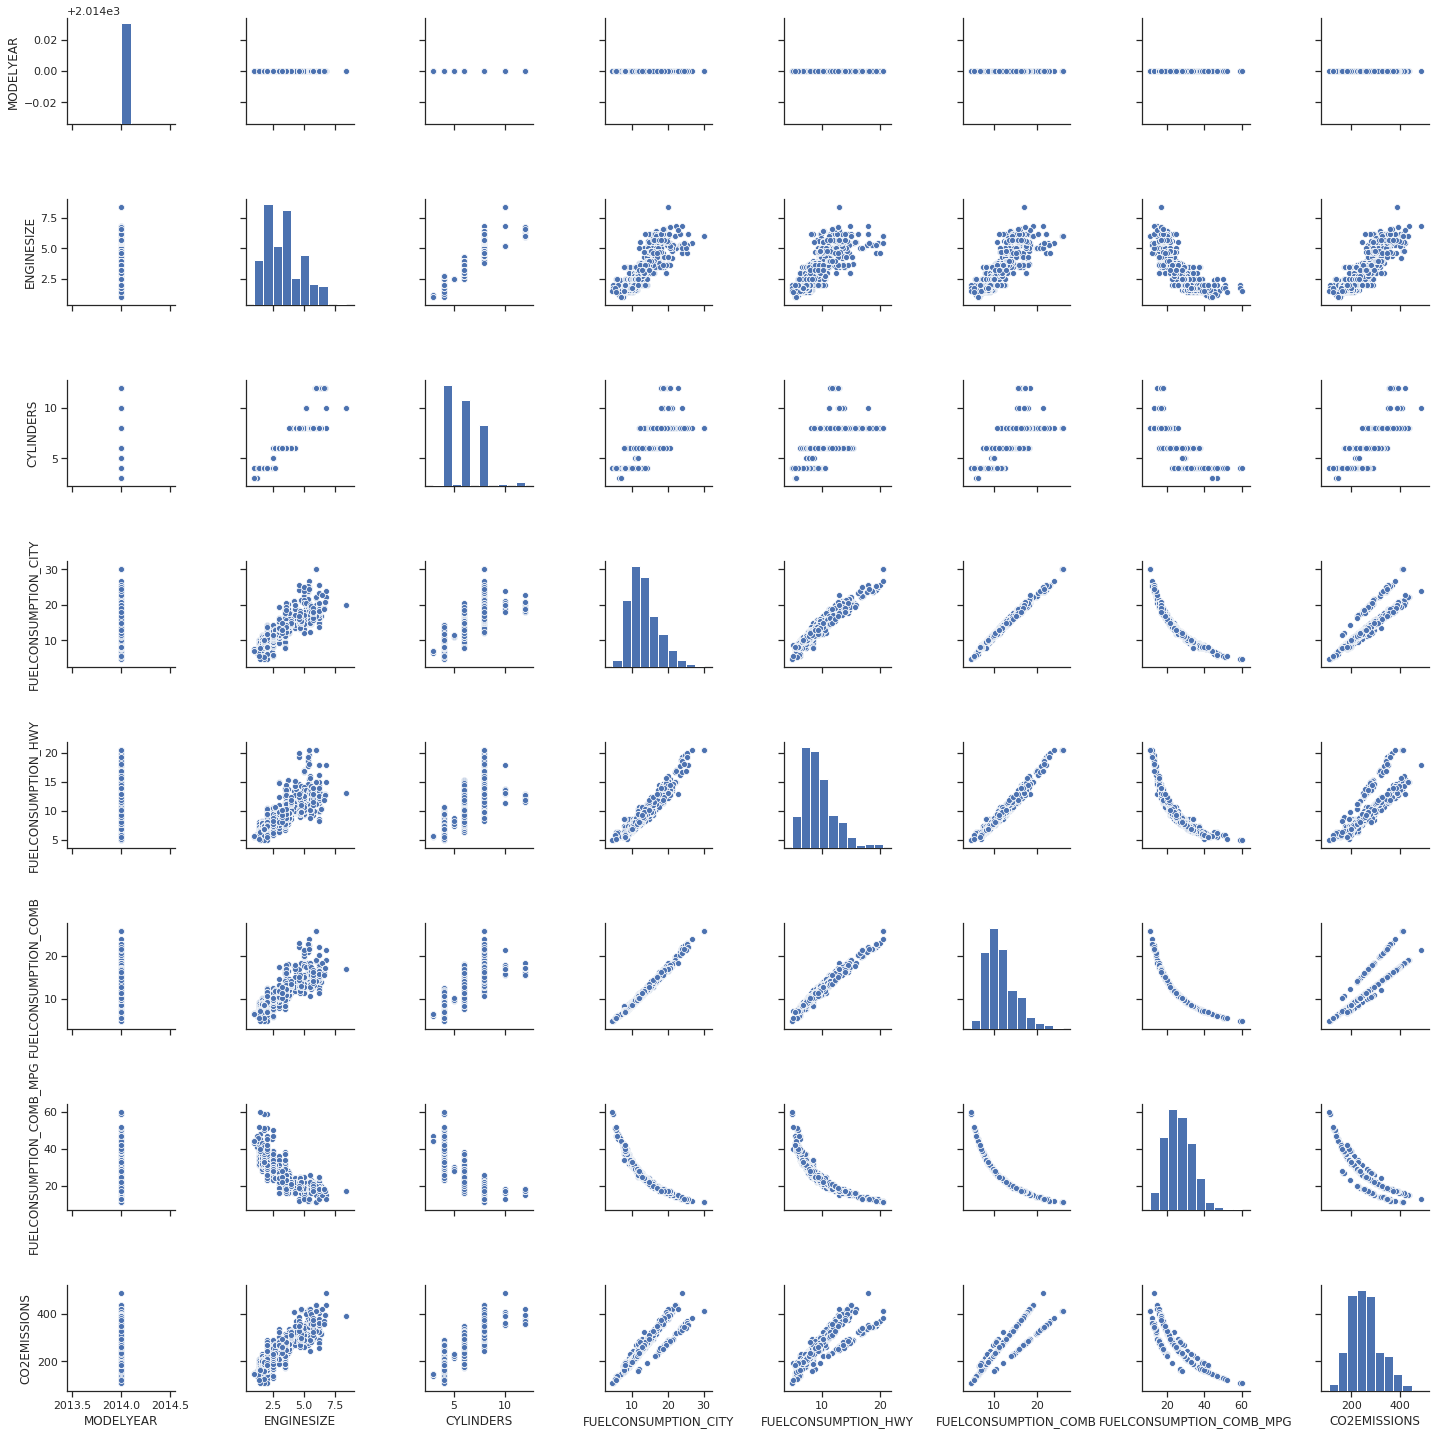

In [22]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df)

Intentemos construir un modelo, mediante un ajuste polinomial, de la emisión de dióxido de carbono en función de la característica "FUELCONSUMPTION_COMB_MPG"

In [0]:
# Escogemos nuestra variable predictora como Engine Size:
X=df['FUELCONSUMPTION_COMB_MPG'].values.reshape(-1,1)

# Escogemos nuestra variable objetivo como las emisiones de CO2:
y=df['CO2EMISSIONS'].values.reshape(-1,1)

**Train and test dataframe**

Creemos ahora los grupos de train y test con los cuales entrenaremos y probaremos el modelo, respectivamente. Recordemos que este paso podemos hacerlo mediante la función `train_test_split` de la librería `sklearn.model_selection`:

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=20)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(853, 1) (853, 1)
(214, 1) (214, 1)


<h2 id="evaluation">Regresión polinómica de los datos:</h2>

Intentemos crear un modelo cuadrático de la emisión de dióxido de carbono en función del tamaño del motor:

$\hat{y} = w_o + w_1 x + w_2 x^2$

En donde x reprenta la variable independiente 'FUELCONSUMPTION_COMB_MPG'. Para resolver este problema usamos la siguiente función:


__PloynomialFeatures()__ es una función de la  librería Scikit-learn, la cual emplea nuevo conjunto de características del conjunto de características original. Es decir, se generará una matriz compuesta de todas las combinaciones polinomiales de las características de grado menor o igual especificado en `degree`. Por ejemplo, suponiendo que el conjunto inicial solo tienen una característica, _FUELCONSUMPTION_COMB_MPG_, entonces, si especificamos `degree=2`, se generarán tres caracteristicas dadas por `degree=0`, `degree=1` y `degree=2`: 

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(x_train)
train_x_poly

array([[1.000e+00, 2.800e+01, 7.840e+02],
       [1.000e+00, 2.700e+01, 7.290e+02],
       [1.000e+00, 1.700e+01, 2.890e+02],
       ...,
       [1.000e+00, 1.700e+01, 2.890e+02],
       [1.000e+00, 3.400e+01, 1.156e+03],
       [1.000e+00, 1.400e+01, 1.960e+02]])

In [26]:
train_x_poly.shape

(853, 3)

El método **fit_transform** tomo los valores de x y crea una lista, elevando los valores en potencias enteras desde 0 hasta 2.

$
\begin{bmatrix}
    x_1\\
    x_2\\
    \vdots\\
    x_n
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & x_1 & x_1^2]\\
    [ 1 & x_2 & x_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & x_n & x_n^2]
\end{bmatrix}
$

De lo anterior se puede notar que se tiene la apariencia de un análisis de regresión multiple, lo que corrobora que la regresión polinómica representa un caso especial de la regresión lineal.

A partir de este punto, podemos tratar nuestro problema como un caso de regresión lineal, de tal forma que podemos usar los mismos mecanismos que se emplean para resolver este tipo de problemas. Podemos usar, por ejemplo, la función  __LinearRegression()__ para solucionar nuestro problema:

In [27]:
clf = LinearRegression()
train_y_ = clf.fit(train_x_poly, y_train)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[  0.         -15.09886556   0.12927416]]
Intercept:  [557.75050432]


En la celda anterior, __Coefficient__ e __Intercept__ corresponden a los parámetros del ajuste de la linea curva. 

Teniendo en cuenta que estamos tratando con una regresión lineal múltiple con 3 parámetros, los cuales representan la intersección y los coeficientes del hiperplano, sklearn los calcula a partir del nuevo conjunto de características. Veamos como luce el ajuste realizado sobre los datos de "COEMISSION" vs "FUELCONSUMPTION_COMB_MPG":

Text(0, 0.5, 'Emission')

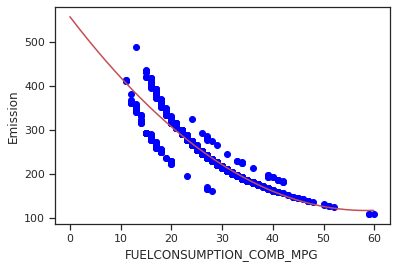

In [28]:
plt.scatter(X, y,  color='blue')
XX = np.arange(0.0, 60.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*XX*XX
plt.plot(XX, yy, '-r')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")

<h2 id="evaluation">Evaluación</h2>

In [29]:
#con la regresion lineal
linear = LinearRegression()
linear.fit(x_train,y_train)

y_pred = linear.predict(x_test)

print('MAE: %.3f '% metrics.mean_absolute_error(y_test, y_pred))
print('MSE: %.3f'% metrics.mean_squared_error(y_test, y_pred))
print('RMSE: %.3f'% np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2: %.3f'% metrics.r2_score(y_test, y_pred))

MAE: 17.371 
MSE: 709.475
RMSE: 26.636
R2: 0.825


In [30]:
#con la regresion polinómica
from sklearn import metrics
test_x_poly = poly.fit_transform(x_test)
test_y_ = clf.predict(test_x_poly)

print('MAE: %.3f' % metrics.mean_absolute_error(test_y_, y_test))
print('MSE: %.3f' % metrics.mean_squared_error(test_y_, y_test))
print('RMSE: %.3f' % np.sqrt(metrics.mean_squared_error(test_y_, y_test)))
print('R2: %.3f'% metrics.r2_score(test_y_, y_test))

MAE: 14.206
MSE: 594.293
RMSE: 24.378
R2: 0.831


## Problema:

Relice un ajuste a un polinomio de grado tres en donde aplique cada uno de los pasos mostrados la regresión polinómica anterior, y evalue si obtiene un mejor modelo.

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

# Código
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(x_train)

clf3 = LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, y_train)

#coeficientes
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)

#graficación
plt.scatter(X, y, color="b")
XX = np.arange(0.0, 60.0, 0.1)
Y = clf3.intercept_ + clf3.coef_[0][1]*XX + clf3.coef_[0][2]*XX**2 + clf3.coef_[0][3]*XX**3
plt.plot(XX,Y,"r-" )
plt.show()

test_x_poly3 = poly3.fit_transform(x_test)
test_y3_ = clf3.predict(test_x_poly3)

print('MAE: %.3f ' % metrics.mean_absolute_error(y_test, test_y3_))
print('MSE: %.3f' % metrics.mean_squared_error(y_test, test_y3_))
print('RMSE: %.3f' % np.sqrt(metrics.mean_squared_error(y_test, test_y3_)))
print('R2-score: %.3f'% metrics.r2_score(y_test, test_y3_))

--->

<p><a name="regnl"></a></p>

# 4. Modelos no lineales

[[Contenidos]](#contents)

Como bien sabemos, si los datos no presentan una tendencia lineal entre las características y las variables objetivo, debemos buscar ajustes a funciones no lineales para la construcción de modelos. Veamos algunas funciones de uso comun para el ajuste de modelos y un ejemplo práctico del crecimiento del producto interno bruto chino.

Las regresiones no lineales representan una relación entre variabres independientes $x$'s y una variable dependiente $y$, lo que resulta en un modelado mediante una función no lieal de los datos. En principio, cualquier relación que no es lineal, puede representarce mediante un polinomio de grado $k$. Por ejemplo: 

$$ \ y = a x^3 + b x^2 + c x + d \ $$

Además, las funciones no lineales pueden tener elementos exponenciales, logarítmicos, fracciones, entre otros. Por 
ejemplo, una función de la forma:

$$ y = \log(a x^5 + b x^3 + c x + d)$$

## Función exponencial

Una función exponencial de base c, se define como 

$Y = a + b c^X$

en donde $b\neq0$, $c > 0$ , $c\neq1$, y la X es un número real. La base, $c$, es una constante y el exponente, $X$, es una variable. Un ejemplo gráfico de la función se presenta a continuación:

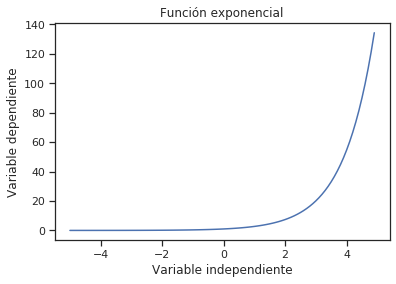

In [31]:
X = np.arange(-5.0, 5.0, 0.1)

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Variable dependiente')
plt.xlabel('Variable independiente')
plt.title('Función exponencial')
plt.show()

## Función logarítmica

La función logarítmica es la función inversa de la función exponecial, y se representa como:

\begin{equation}
y = \log(X)
\end{equation}

Una representación gráfica de esta función se muestra a continuación:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


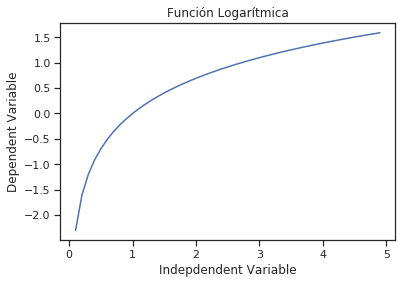

In [32]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.title('Función Logarítmica')
plt.show()

## Función sigmoide/logística

La función sigmoide tiene la forma 

$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

Y veremos, más adelante, en este curso, una aplicación en la la regresión logística. Una representación gráfica de la función se presenta a continuación:

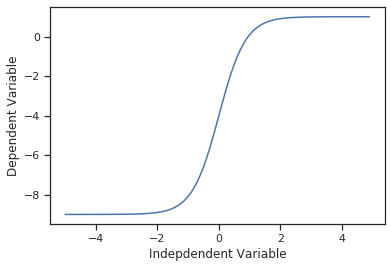

In [33]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-10/(1+np.power(10, X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

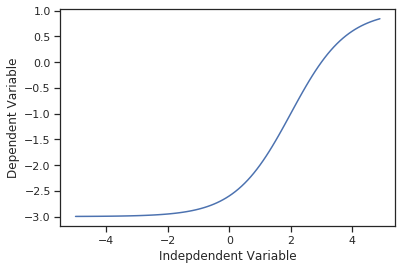

In [34]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

## Ejemplo de regresión no lineal:

Intentemos encontra un modelo no lineal para representar los datos del producto interno bruto de China, entre los años 1960 a 2014. El dataset se presenta a continuación:

In [35]:
import numpy as np
import pandas as pd

df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


### Gráfica del dataset ###

Veamos como luce el dataset:

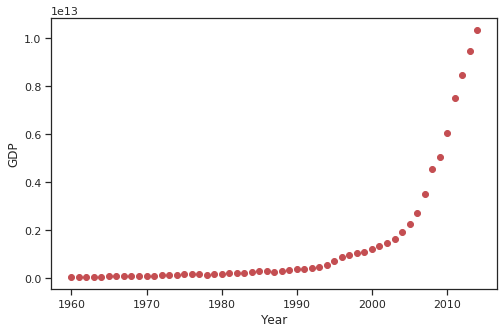

In [36]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

Esta gráfica parece seguir un comportamiente logístico o exponencial. El crecimiento lento del PIB empieza alrededor del año 1995, y a partir del año 2005 empieza a ser significativo, para luego caer muy poco alrededor del 2010. 

### Determinación del modelo ###

De una inspección inical, podemos determinar que una aproximación logística podría ser adecuada, ya que empieza a crecer lentamente, y aumenta a mitad de camino, para desacelerarse un poco al final. Veamos la siguiente función:

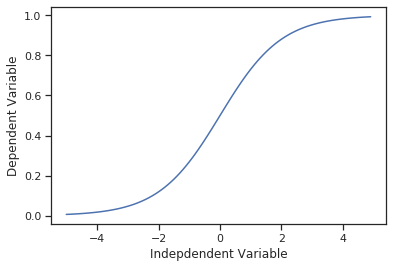

In [37]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

De la ecuación de la función logística:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

Tenemos que

$\beta_1$: contrala la inclinación de la curva,

$\beta_2$: proyecta la curva en x.

### Construcción del modelo###

Construyamos nuestro modelo de regresión e inicialicemos los parámetros:

In [0]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Veamos un ajuste preliminar "a  mano" de una función sigmoide a los datos

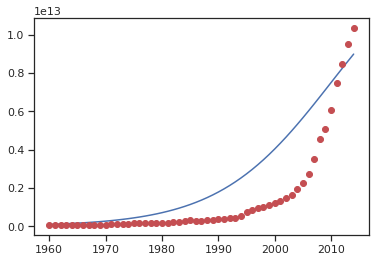

In [39]:
beta_1 = 0.10
beta_2 = 2010.0

#logistica
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot predicción inicial
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

El objetivo en este modelo es encontrar los parámetros que mejor ajustan la curva a los datos. Procedamos a normalizarlos:

In [0]:
# normalicemos los datos
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

Usemos el método __curve_fit__ `scipy`, que usa un ajuste de mínimos cuadrados no lineal para ajustar nuesta función sigmoide a los datos. El algoritmo ajusta iterativamente los parámetros, de tal forma que la suma de los residuos cuadrados $sig(x_{data}, *popt) - y_{data}$ se minimiza.

In [41]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#imprimamos los parámetros
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453017, beta_2 = 0.997207


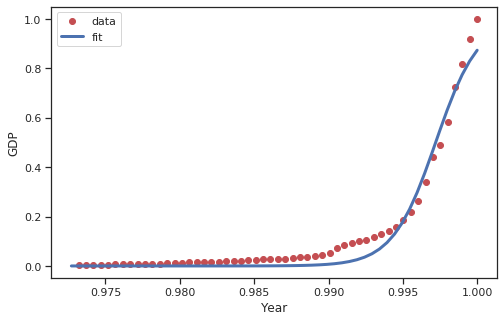

In [42]:
# Visualización del modelo
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Problema:
Evalue la precisión del modelo creado anteriormente.

In [43]:
#Reshape data
X=xdata.reshape(-1,1)
y=ydata.reshape(-1,1)

#Split 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xdata,ydata, test_size=0.2, random_state=1)

# crear el modelo
popt, pcov = curve_fit(sigmoid, x_train, y_train)

# predicciones sobre el dataset de test
y_hat = sigmoid(x_test, *popt)

# Evaluacion
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
#print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , y_test) )


Mean absolute error: 0.04
R2-score: 0.97


Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

#Reshape data
X=xdata.reshape(-1,1)
y=ydata.reshape(-1,1)

#Split 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xdata,ydata, test_size=0.2, random_state=1)

# crear el modelo
popt, pcov = curve_fit(sigmoid, x_train, y_train)

# predicciones sobre el dataset de test
y_hat = sigmoid(x_test, *popt)

# Evaluacion
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , y_test) )
--->